In [ ]:

   Пока не доделанно. Прошу подождать с проверкой.

#     Проектная работа по модулю “Препроцессинг данных”
#  1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений
#     биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли
#     содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –
#     alicious). Описание данных доступно на сайте https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
#  2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
#  3. Выбрать стратегию для работы с пропущенными значениями.
#  4. Рассчитать и визуализировать корреляционную матрицу для переменных.
#  5. Визуализировать взаимосвязи между переменными.
#  6. С помощью статистических методов проверить взаимосвязи между переменными.
#  7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих
#     двух подходов даст лучший результат при классификации?
#  8. Провести стратегию Oversampling/Undersampling, проверить дает ли она улучшение результатов.
#  9. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=10).
# 10. Рассчитать Feature Selection для выбранных переменных.
# 11. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2
#     алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и
#     вывести вероятность каждого класса.
# 12. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
# 13. Проверить качество вероятности класса с использованием метрики: Brier Score
# 14. * Осуществить запуск вашего скрипта с использованием Docker.
# 15. Загрузить результат (в формате .ipynb ноутбука либо докер реализации) в репозиторий. Разместить ссылку в лк

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import statsmodels.formula.api as smf
import scipy
from scipy import stats

In [6]:
# 1. Загрузить файл data_breast.csv. 

In [7]:
data = pd.read_csv('data_breast.csv')

In [8]:
# Основная информация о данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
data.diagnosis.value_counts() 

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [12]:

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
data.rename(columns={'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se', 'concave points_worst': 'concave_points_worst'}, inplace=True)

In [49]:
# 3. Выбрать стратегию для работы с пропущенными значениями.

In [50]:
# В датасете присутствует переменная "Unnamed: 32" все значения которой равны NaN 

In [51]:
#4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [52]:
corr = data.corr()

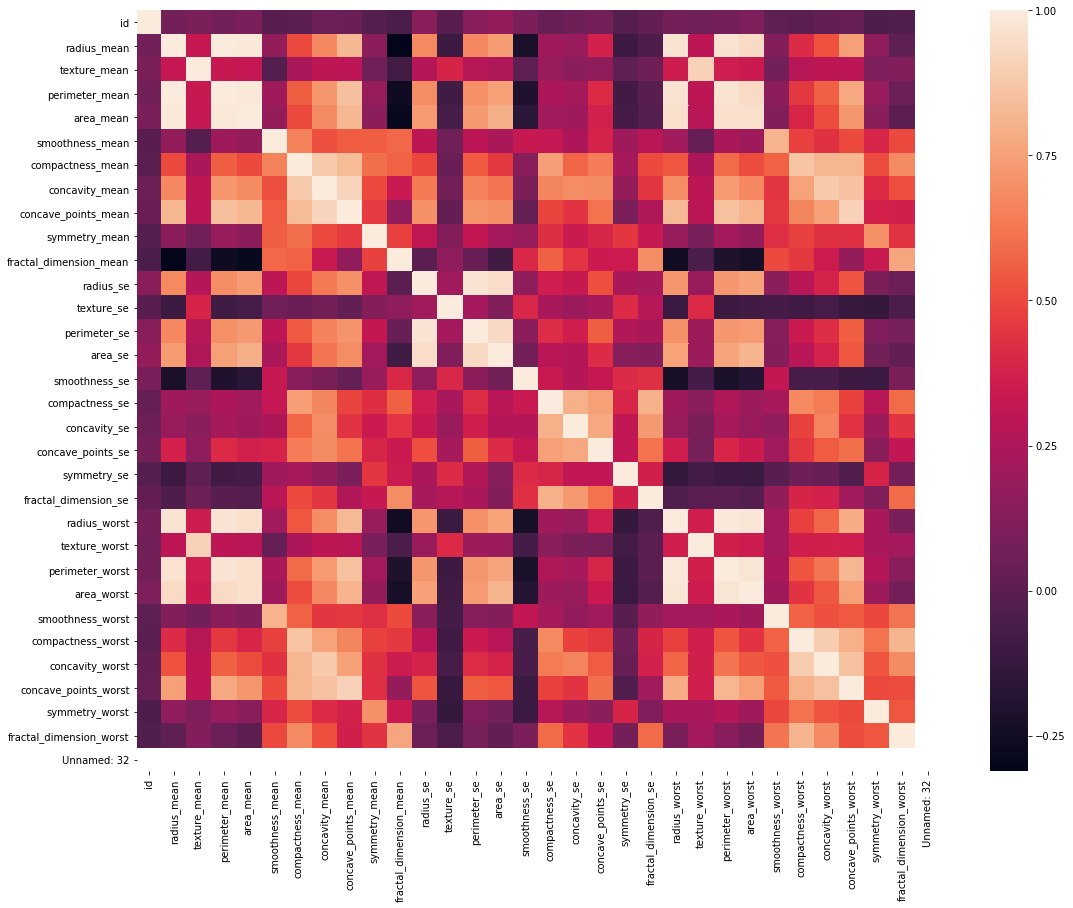

In [53]:
matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(corr)

In [54]:
# 5. Визуализировать взаимосвязи между переменными.

In [55]:
# Построим зависимости между переменными

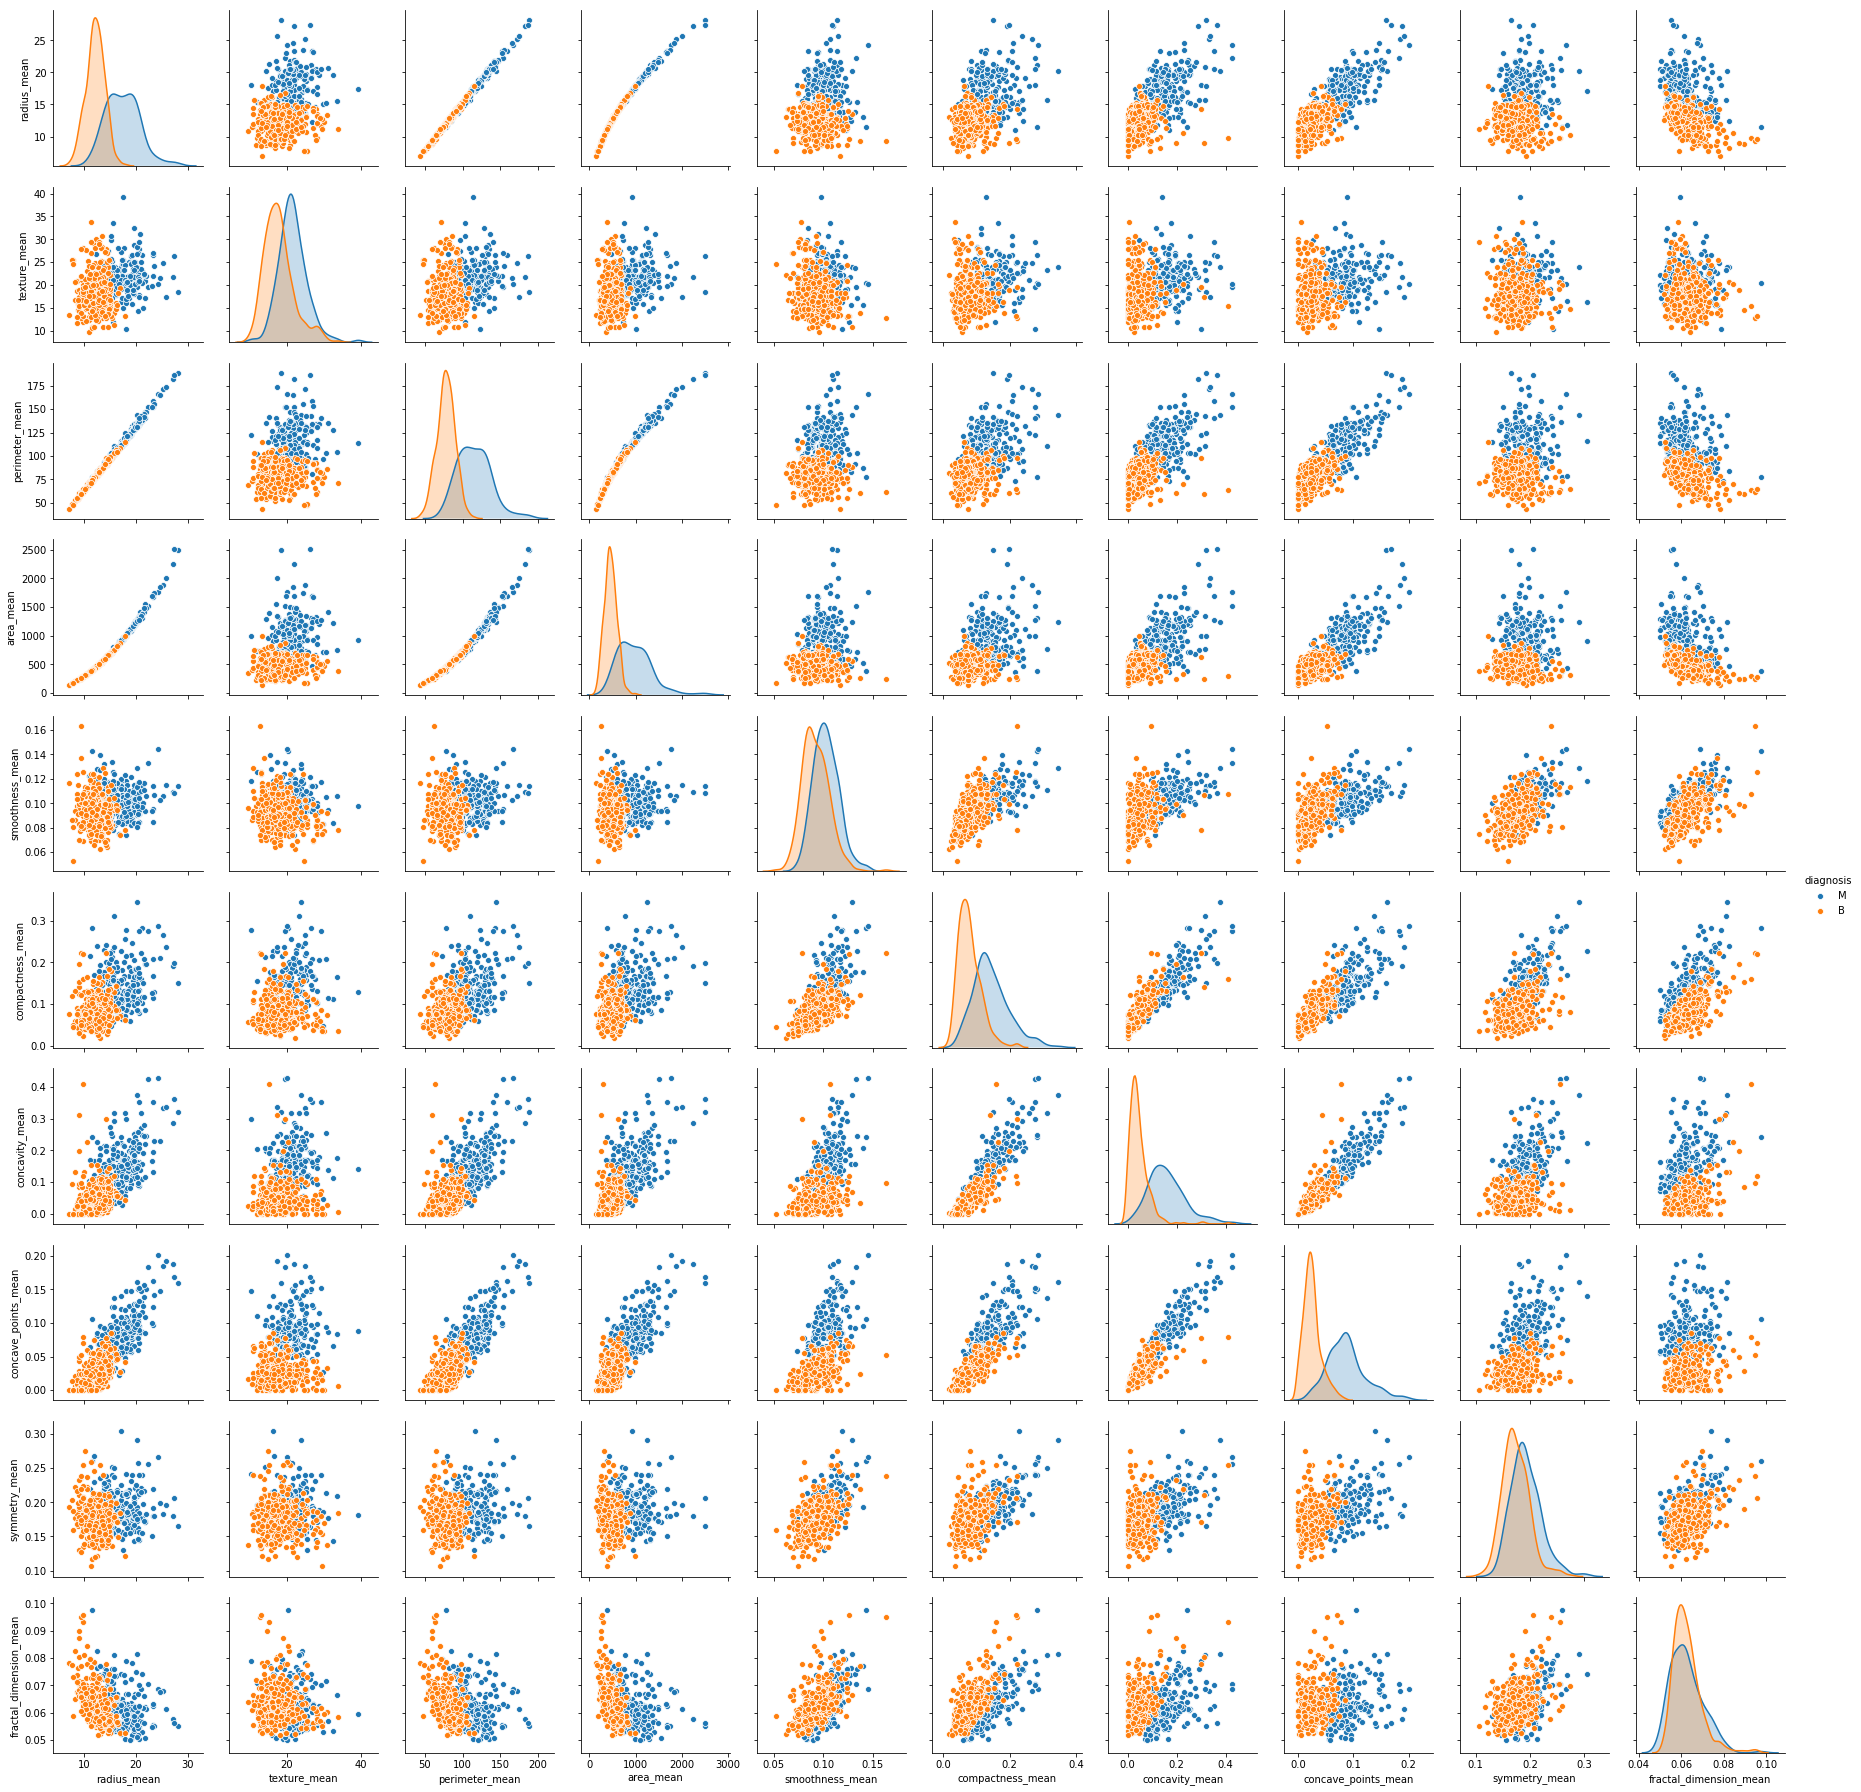

In [56]:
sns.pairplot(data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', \
                   'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']], \
            hue='diagnosis')

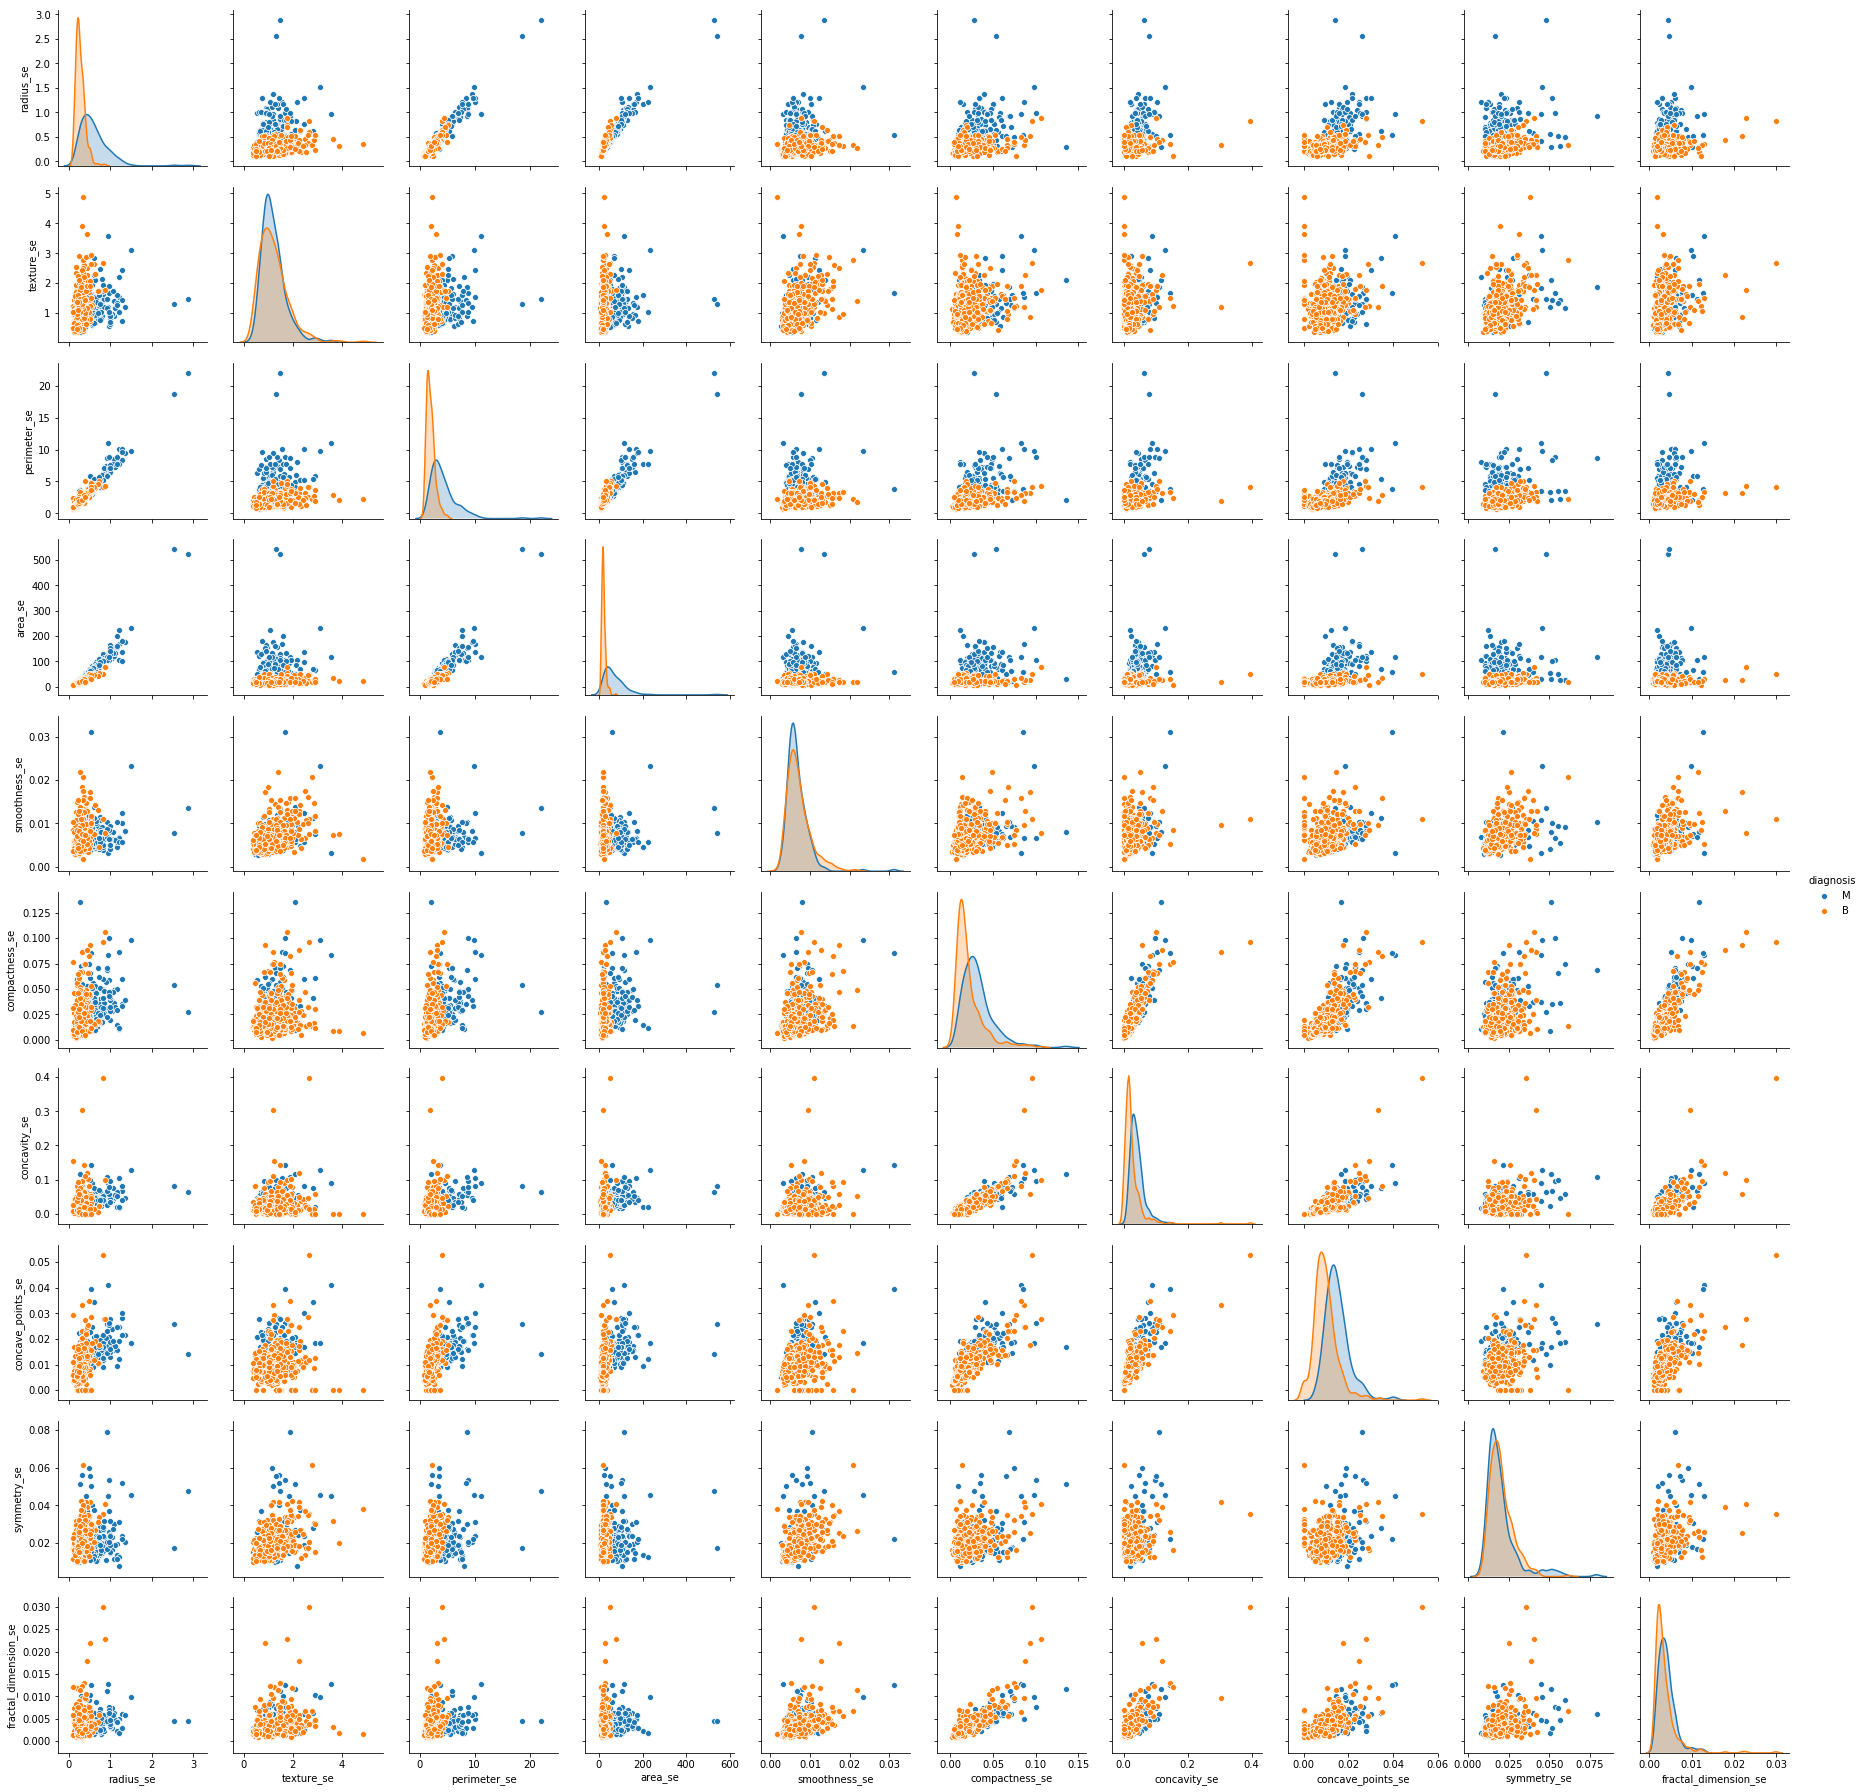

In [57]:
sns.pairplot(data[['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', \
                   'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se']], \
            hue='diagnosis')

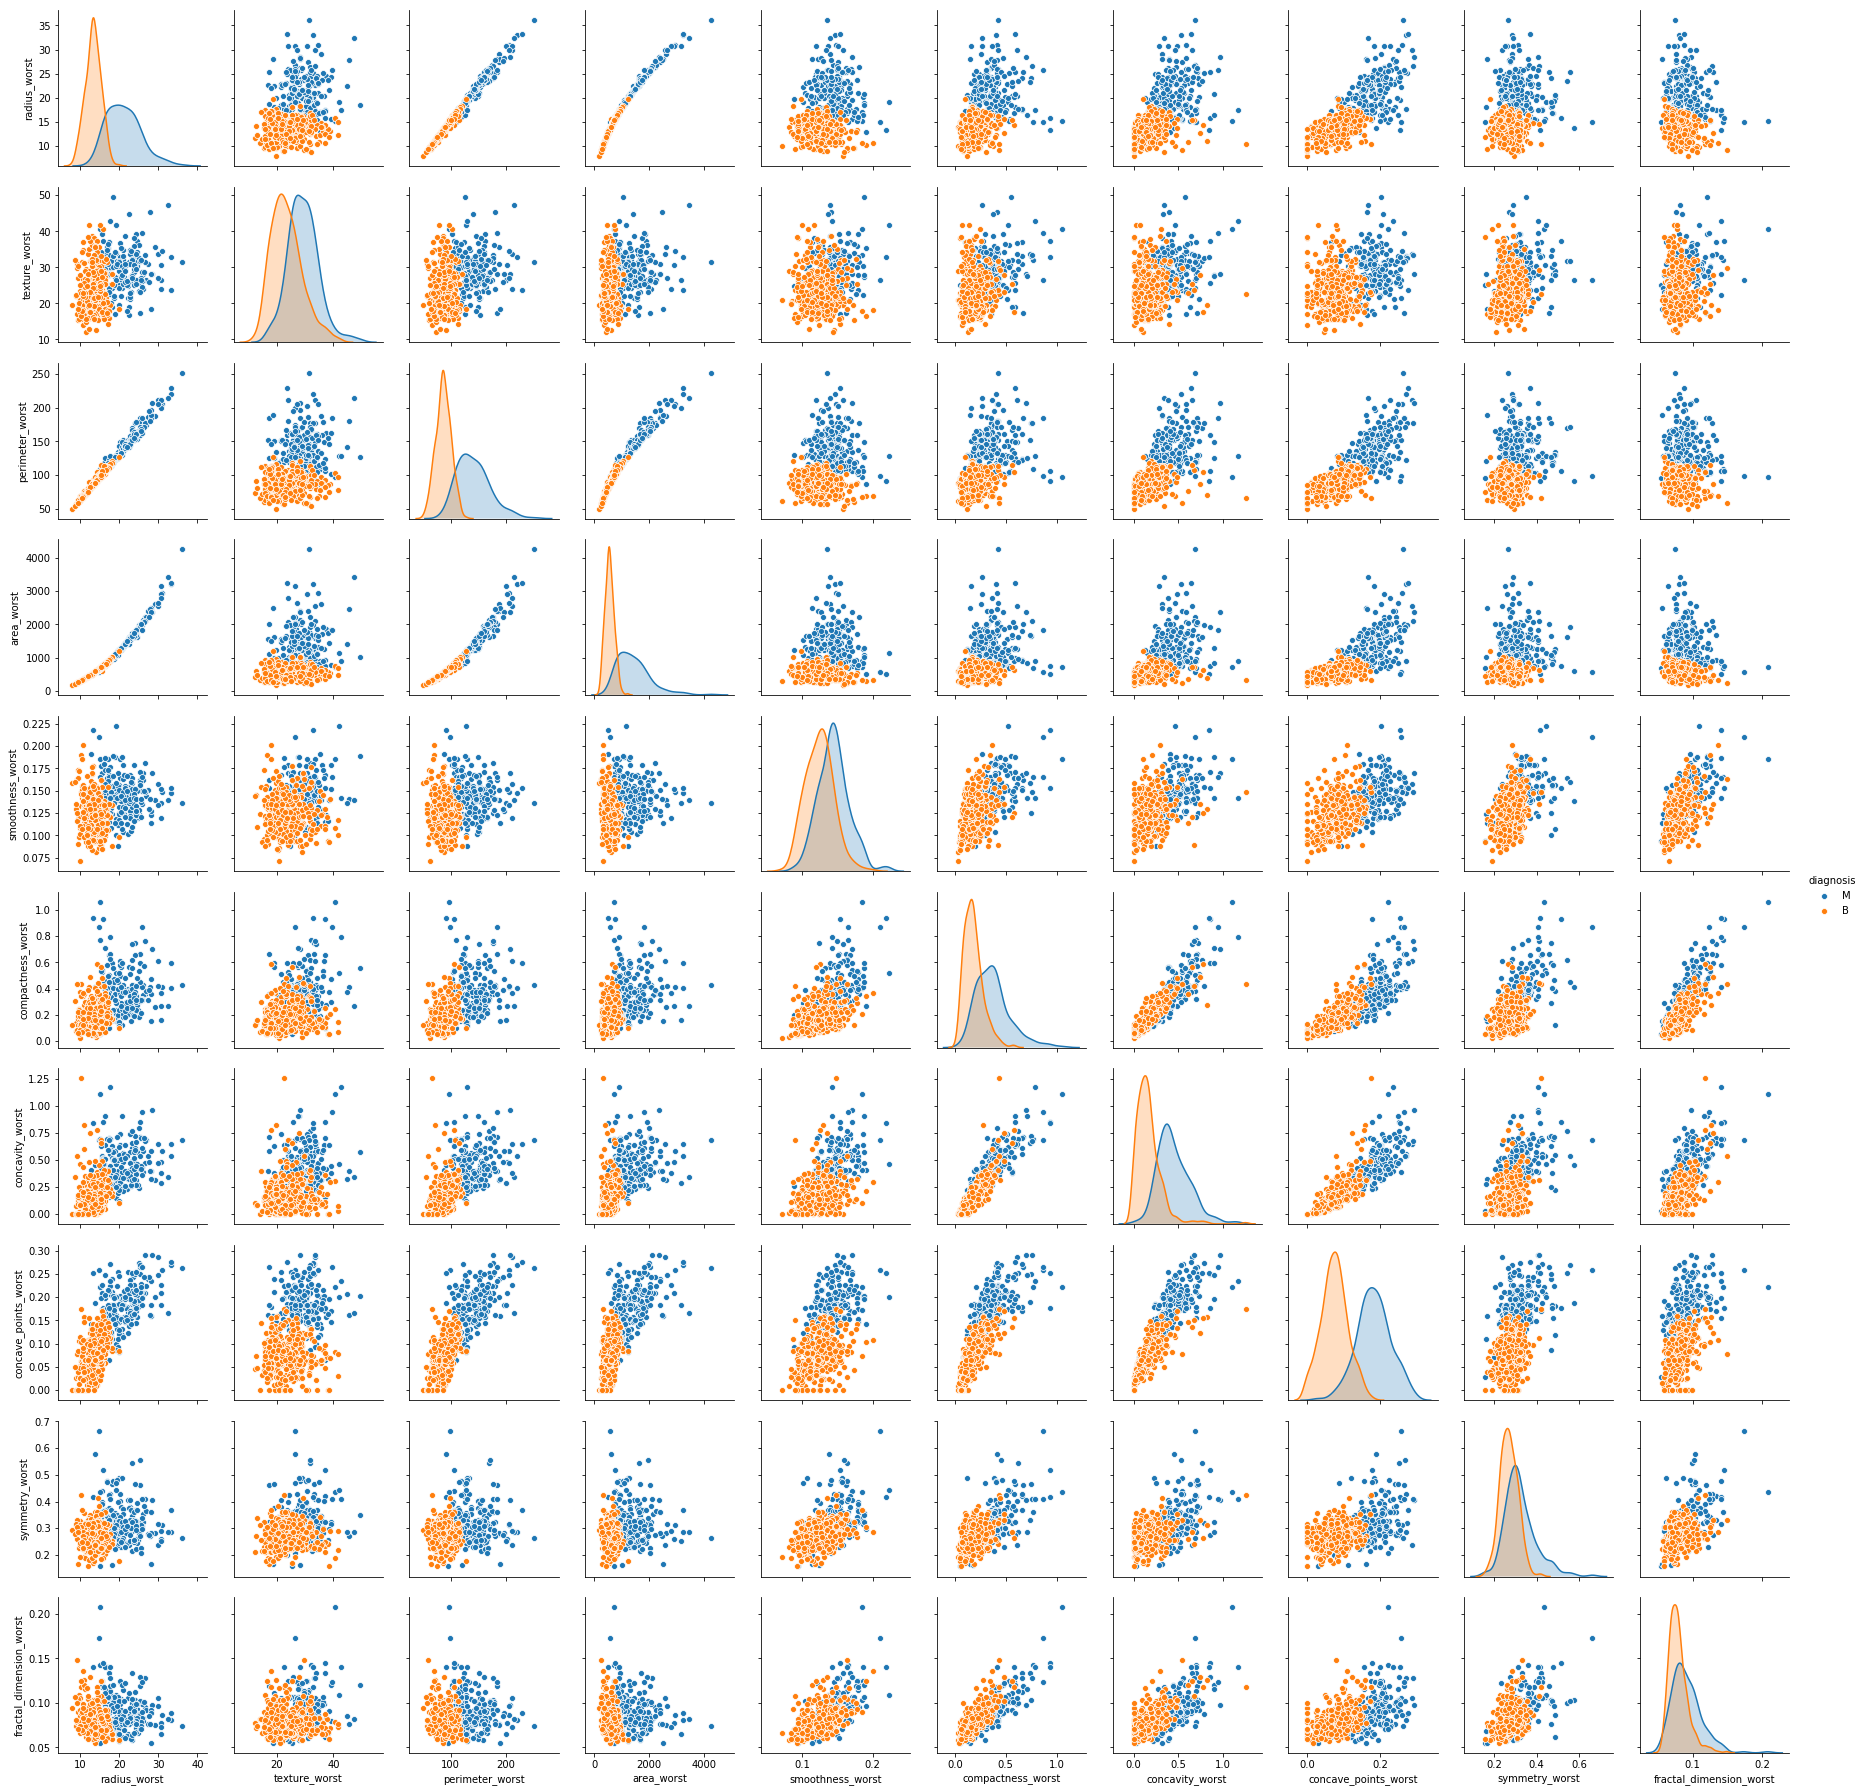

In [58]:
sns.pairplot(data[['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', \
                   'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']], \
            hue='diagnosis')

In [59]:
# 6. С помощью статистических методов проверить взаимосвязи между переменными.

In [60]:
#  проверим 

keys = set(data.keys()) - set(['Unnamed: 32','diagnosis', 'id'])
#print(keys)
for key in list(keys):
    print('Param: ', key)
    print(stats.ttest_ind(data[data['diagnosis'] == 'M'][key],data[data['diagnosis'] == 'B'][key]))

Param:  texture_mean
Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)
Param:  radius_worst
Ttest_indResult(statistic=29.33908156342075, pvalue=8.482291921684414e-116)
Param:  symmetry_se
Ttest_indResult(statistic=-0.1552978000059369, pvalue=0.8766418183858812)
Param:  compactness_worst
Ttest_indResult(statistic=17.445373681975457, pvalue=7.069816352538377e-55)
Param:  perimeter_se
Ttest_indResult(statistic=15.934158019257902, pvalue=1.6519051758498057e-47)
Param:  concavity_se
Ttest_indResult(statistic=6.246157343266937, pvalue=8.260176167970051e-10)
Param:  fractal_dimension_mean
Ttest_indResult(statistic=-0.30571112978583087, pvalue=0.7599368037256238)
Param:  concave_points_mean
Ttest_indResult(statistic=29.354318592113618, pvalue=7.101150161057422e-116)
Param:  fractal_dimension_worst
Ttest_indResult(statistic=8.151316497940705, pvalue=2.316432449982829e-15)
Param:  concave_points_worst
Ttest_indResult(statistic=31.054555115984236, pvalue=1.96909970721643

In [61]:
# для параметров fractal_dimension_mean, smoothness_se,  
# texture_se, symmetry_se и fractal_dimension_se мы не можем отклонить нулевую гипотезу

In [62]:
# 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих
#     двух подходов даст лучший результат при классификации?

In [63]:
# Используем различные варианты изменения размерности

In [64]:
data1 = data.copy()

In [65]:
data1['diagnosis'] = data1['diagnosis'].map({'M':1,'B':0})
data1 = data1.drop(columns=['Unnamed: 32','diagnosis'])

In [66]:
# 7.1 PCA

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_sc = sc.fit_transform(data1)

/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/user/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99).fit(train_sc)
train_pca = pca.transform(train_sc)


In [69]:
train_pca.shape

(569, 18)

Text(0, 0.5, 'explained_variance_ratio_')

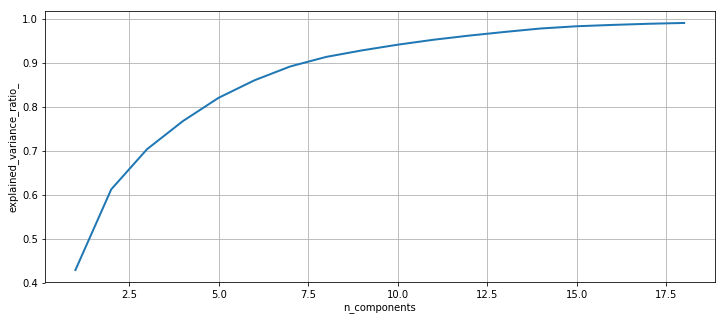

In [70]:
import matplotlib.pyplot as plt
matplotlib.pyplot.figure(figsize=(12, 5))
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [71]:
# 7.2 Cнизим размерность отобрав признаки по критерию  
# 

In [92]:
data2 = data.copy()
data2['diagnosis'].map({'M':1,'B':0})

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [98]:
keys = data2.keys()
res = []
for key in list(set(keys)-set(['diagnosis','Unnamed: 32','id'])):
    
    res.append(smf.ols(formula = 'diagnosis ~ id + '+ key, data=data2).fit())
#res.append({'lm_inter':est.params['Intercept'],
#            'lm_x':est.params['index']}, ignore_index=True)
    x = est.summary()
    print(est.params)

ValueError: shapes (569,2) and (569,2) not aligned: 2 (dim 1) != 569 (dim 0)